# Here is the SVM!

A SVM is a binary classifier, therfore the multiclassificationproblem will use ovo and ovr.

The SVM takes non-linerly separable data, maps it to a set that is linearly separable in an other dimension. In the file first the data is reframed from a 20x20 matrix to a 1x400 matrix. The SVM is then applied and fitted to the data. The code calculates the accuarcy for both cvc and cvr to find optimal approach. In the SVM different kernel functions provides different decision bondaries. The accuarcy using Linear, RBF, Polonomial and Sigmoid kernel is therfore calculated. 

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split


# Get variabels
Get X_train, X_test, Y_train, Y_test from LoadDataGR

In [23]:
#%store -r X_train, X_test, Y_train, Y_test

# Change dim of matrix
Shape of matrices:
X_train = (40132, 20, 20)
X_test = (10033, 20, 20)
Y_train = (40132, 6)
Y_test = (10033, 6)

In [22]:
np.reshape(X_train, (40132, 400))
np.reshape(X_test, (10033, 400))

[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]
(2, 4, 4)


array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]])

# A small random data set

The data set is provided to quickly try new changes in the model.

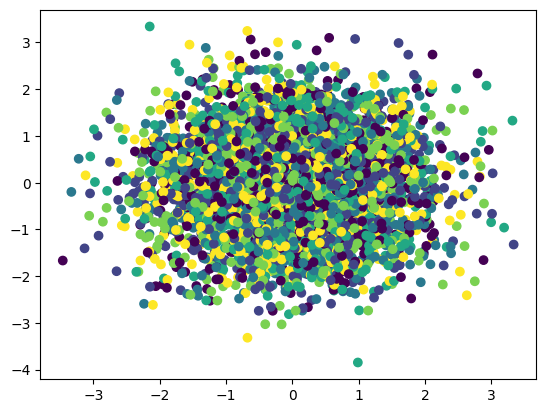

In [3]:
X, Y = make_classification(
    n_samples=5016, 
    n_features=40,
    n_informative=6,  
    n_classes=6,
    n_clusters_per_class=1, 
    flip_y=0,
    class_sep=2.0,
    shuffle=True,
    random_state=1337
)

Y = Y.astype(np.float32)
X = X.astype(np.float32)


plt.scatter(X[:,2], X[:,3], c=Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state = 0)

# OVO vs OVR

OVR = One vs Rest
Binary Classification Problem 1: red vs [blue, green]
Binary Classification Problem 2: blue vs [red, green]
Binary Classification Problem 3: green vs [red, blue]

OVO = One vs One
Binary Classification Problem 1: red vs blue
Binary Classification Problem 2: blue vs green
Binary Classification Problem 3: green vs red

The problem generating the highest probability is choosen in both classifiers. Uppside with OVO is that since it needs to claculate fewer problems it is better for bigger data sets. 

# Train the data 

C:\Users\chokl\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


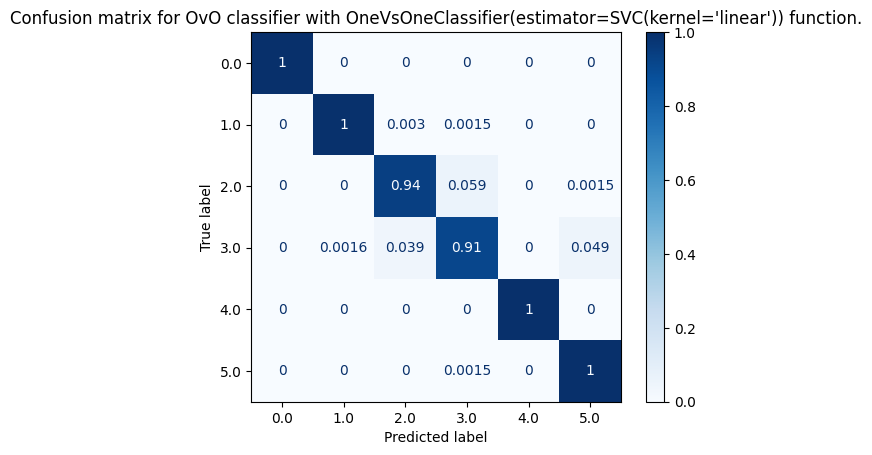

C:\Users\chokl\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


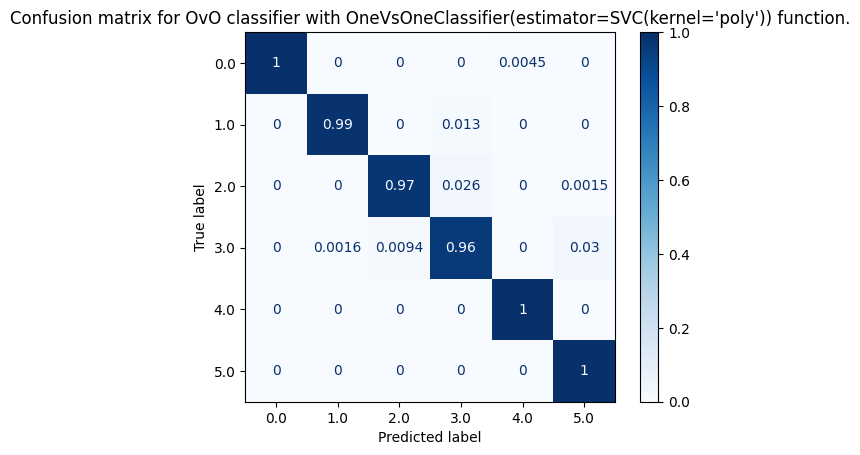

C:\Users\chokl\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


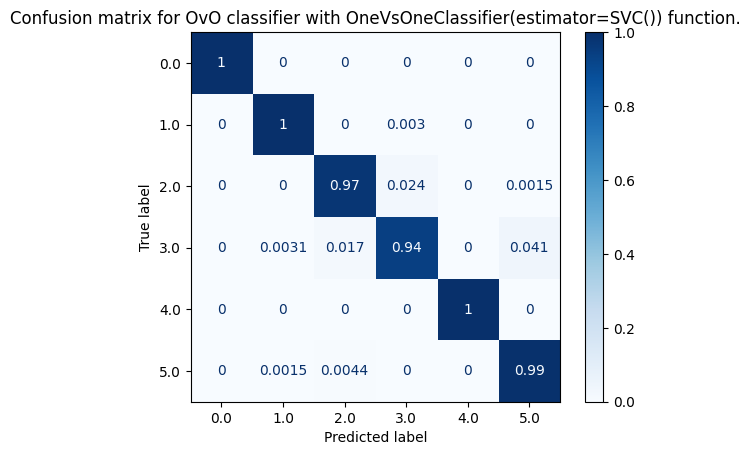

C:\Users\chokl\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


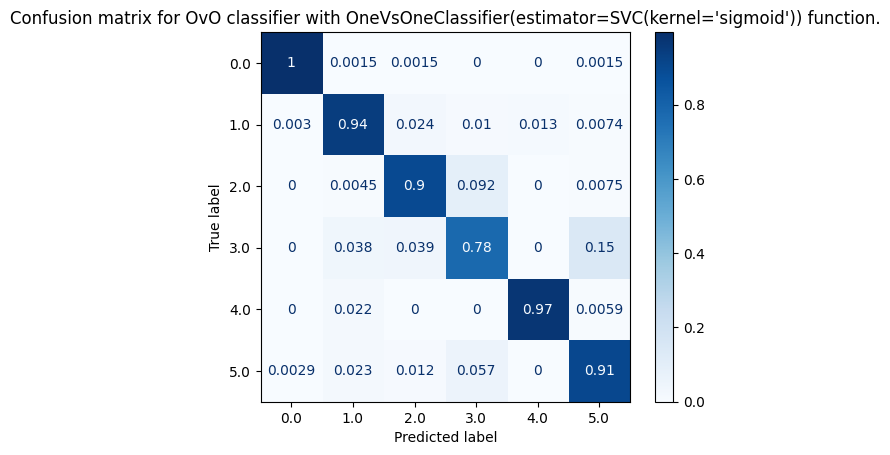

Accuracy Linear Kernel: 0.9402390438247012
Accuracy Polynomial Kernel: 0.9492031872509961
Accuracy Radial Basis Kernel: 0.953187250996016
Accuracy Sigmoid Kernel: 0.899402390438247


In [4]:
def SVM(kernel):
    svc = SVC(kernel=kernel)
    return OneVsOneClassifier(svc)

def SVM_model(X_train, Y_train, X_test, Y_test):

    models = []
    linearovo = SVM('linear')
    linearovo.fit(X_train, Y_train)
    models.append(linearovo)
    polyovo = SVM('poly')
    polyovo.fit(X_train, Y_train)
    models.append(polyovo)
    rbfovo = SVM('rbf')
    rbfovo.fit(X_train, Y_train)
    models.append(rbfovo)
    sigovo = SVM('sigmoid')
    sigovo.fit(X_train, Y_train)
    models.append(sigovo)

    
    for model in models:
        
        matrix = plot_confusion_matrix(model, X_train, Y_train,
                                        cmap=plt.cm.Blues,
                                        normalize='true')
        plt.title(f'Confusion matrix for OvO classifier with {model} function.')
        plt.show(matrix)
        plt.show()
    linear_pred = linearovo.predict(X_test)
    poly_pred = polyovo.predict(X_test)
    rbf_pred = rbfovo.predict(X_test)
    sig_pred = sigovo.predict(X_test)
    accuracy_lin = linearovo.score(X_test, Y_test)
    accuracy_poly = polyovo.score(X_test, Y_test)
    accuracy_rbf = rbfovo.score(X_test, Y_test)
    accuracy_sig = sigovo.score(X_test, Y_test)
    print('Accuracy Linear Kernel:', accuracy_lin)
    print('Accuracy Polynomial Kernel:', accuracy_poly)
    print('Accuracy Radial Basis Kernel:', accuracy_rbf)
    print('Accuracy Sigmoid Kernel:', accuracy_sig)
    


SVM_model(X_train, Y_train, X_test, Y_test) 

      

# The OVR
Used if OVO generates a weird result.

C:\Users\chokl\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


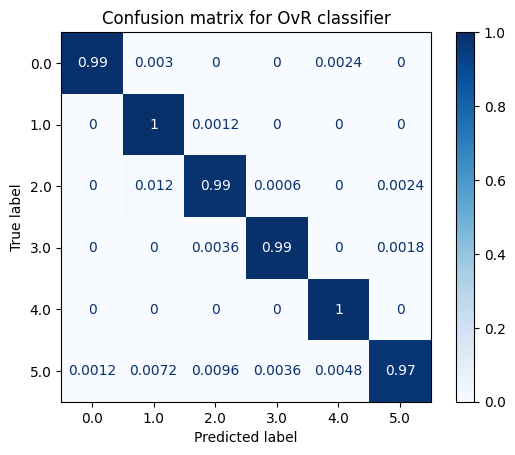

In [217]:

ovr_classifier = OneVsRestClassifier(svc)
ovr_classifier = ovr_classifier.fit(X, Y)
matrix = plot_confusion_matrix(ovr_classifier, X, Y,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for OvR classifier')
plt.show(matrix)
plt.show()